<a href="https://colab.research.google.com/github/sampreeth4/-ConsultancyBetav2/blob/main/Influencer_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [32]:
df = pd.read_csv("Youtube.csv")
df.head()

,Influencer_ID,Influencer_Name,Platform,Subscribers,Post_Categories,Country,Visits,Likes,Comments,Engagement_Rate(%),Profile_Link
0,INF00000,tseries,YouTube,253500000,Música y baile,India,111300,3200,120,0.001310,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,INF00001,MrBeast,YouTube,210100000,"Videojuegos, Humor",Estados Unidos,95400000,5400000,16600,2.578106,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,INF00002,CoComelon,YouTube,168100000,Educación,Unknown,4100000,21600,0,0.012849,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,INF00003,SETIndia,YouTube,165400000,Unknown,India,23300,239,9,0.000150,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,INF00004,KidsDianaShow,YouTube,116500000,"Animación, Juguetes",Unknown,4100000,8800,0,0.007554,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [33]:

def classify_engagement(rate):
    if rate < 0.01:
        return 'Low'
    elif rate < 0.03:
        return 'Medium'
    else:
        return 'High'

df['Engagement_Level'] = df['Engagement_Rate(%)'].apply(classify_engagement)


In [34]:

df = df.drop(['Engagement_Rate(%)', 'Influencer_ID', 'Influencer_Name', 'Profile_Link'], axis=1)

# Fill missing values
df['Post_Categories'] = df['Post_Categories'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Platform'] = df['Platform'].fillna('Unknown')

# Encode categoricals
df_encoded = pd.get_dummies(df, columns=['Post_Categories', 'Country', 'Platform'], drop_first=True)


In [35]:

X = df_encoded.drop('Engagement_Level', axis=1)
y = df_encoded['Engagement_Level']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Random Forest Accuracy: 0.94
Logistic Regression Accuracy: 0.77

 Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.98      0.97      0.98       108
         Low       0.93      0.97      0.95        69
      Medium       0.76      0.70      0.73        23

    accuracy                           0.94       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.94      0.94      0.94       200


 Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.82      0.87       108
         Low       0.64      0.93      0.76        69
      Medium       0.25      0.04      0.07        23

    accuracy                           0.77       200
   macro avg       0.61      0.60      0.57       200
weighted avg       0.75      0.77      0.74       200



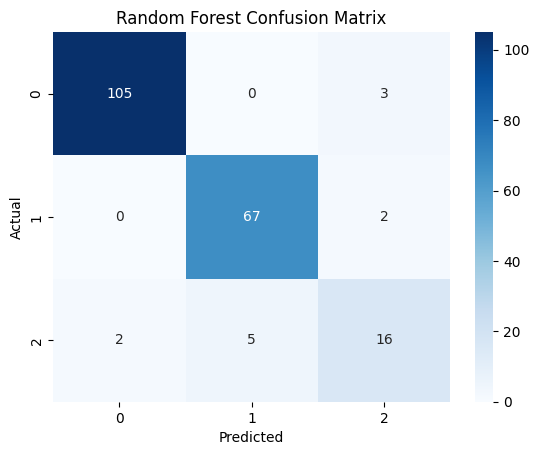

In [38]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\n Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Optional: Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()